In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
tips = sns.load_dataset("tips")
x = tips[['total_bill', 'tip']]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [6]:
# Determine the optimal number of clusters (K) using the elbow method
wcss=[]
for i in range(1,11):
  Kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  Kmeans.fit(X_scaled)
  wcss.append(Kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

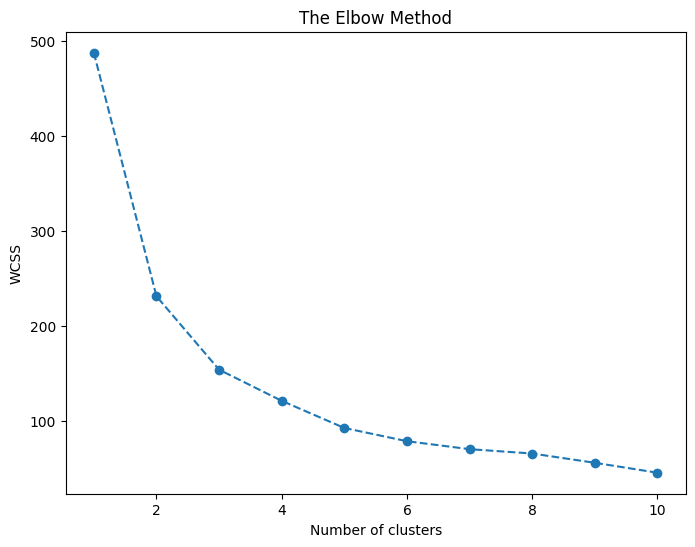

In [7]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

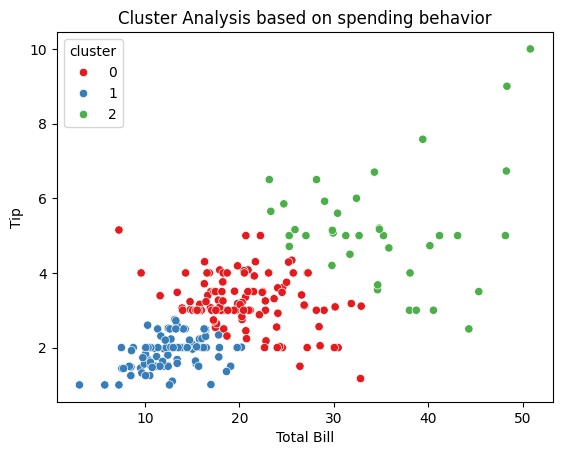

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(X_scaled)
tips['cluster'] = kmeans.labels_

sns.scatterplot(data=tips , x = 'total_bill', y='tip', hue= 'cluster', palette='Set1')
plt.title('Cluster Analysis based on spending behavior')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [12]:
tips = sns.load_dataset("tips")
x = tips[['total_bill', 'tip']]

In [13]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(x)

In [18]:
linked = linkage(X_scaled, method='ward', metric='euclidean')

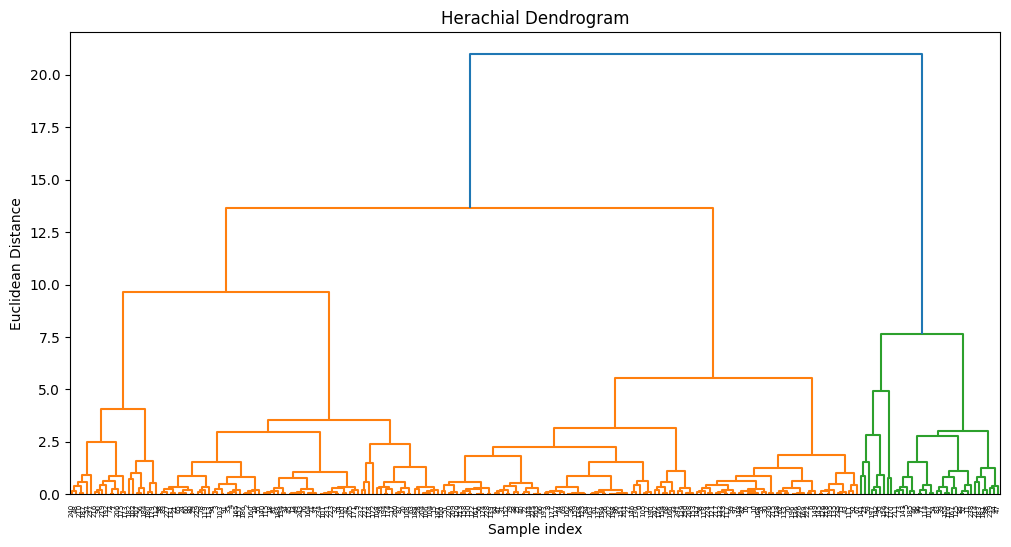

In [23]:
plt.figure(figsize=(12,6))
dendrogram(linked,
          orientation='top', # Changed 'oriantation' to 'orientation'
          labels=np.array(range(len(x))),
          distance_sort='descending',
          show_leaf_counts=True)
plt.title('Herachial Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean Distance')
plt.show()